In [193]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

code_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "code"))
sys.path.append(code_dir)

from anonymization.utils import compute_block_probability_matrix, generate_anonymized_graph

In [194]:
n = 100
K = 5
seed = 2025
dataset = "facebook"
algorithm = "hybrid"  # Fixed for this script
filename_suffix = f"n{n}_K{K}_seed{seed}"

results_dir = f"../data/results/real/{dataset}/{algorithm}"
plot_dir = f"{results_dir}/plots"
os.makedirs(plot_dir, exist_ok=True)

In [195]:
A_original = np.load(f"../data/real/{dataset}/adjacency_A_{dataset}_n{n}_seed{seed}.npy")
z = np.load(f"{results_dir}/z_anonymized_{algorithm}_{filename_suffix}.npy")
block_sizes = np.load(f"{results_dir}/final_block_sizes_{filename_suffix}.npy")

In [196]:
G_original = nx.from_numpy_array(A_original)
layout = nx.spring_layout(G_original, seed=seed)

B, _ = compute_block_probability_matrix(A_original, z)
adj_path = f"{results_dir}/adj_matrix_{filename_suffix}.npy"
if not os.path.exists(adj_path):
    print("Generating anonymized adjacency matrix A_hat using SBM sampling...")
    A_hat = generate_anonymized_graph(z, B, seed=seed)
    np.save(adj_path, A_hat)
else:
    A_hat = np.load(adj_path)

G_anonymized = nx.from_numpy_array(A_hat)

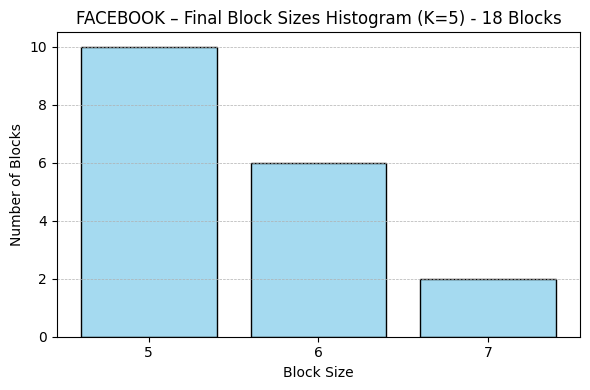

In [197]:
# --- Plot 1: Final Block Sizes ---
plt.figure(figsize=(6, 4))
sns.histplot(
    block_sizes,
    bins=range(min(block_sizes), max(block_sizes) + 2),
    discrete=True,
    shrink=0.8,
    color="skyblue",
    edgecolor="black",
)
plt.title(f"{dataset.upper()} – Final Block Sizes Histogram (K={K}) - {len(block_sizes)} Blocks")
plt.xlabel("Block Size")
plt.ylabel("Number of Blocks")
plt.xticks(range(min(block_sizes), max(block_sizes) + 1))
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig(f"{plot_dir}/final_block_sizes_{filename_suffix}.png", dpi=500, bbox_inches="tight")
plt.show()

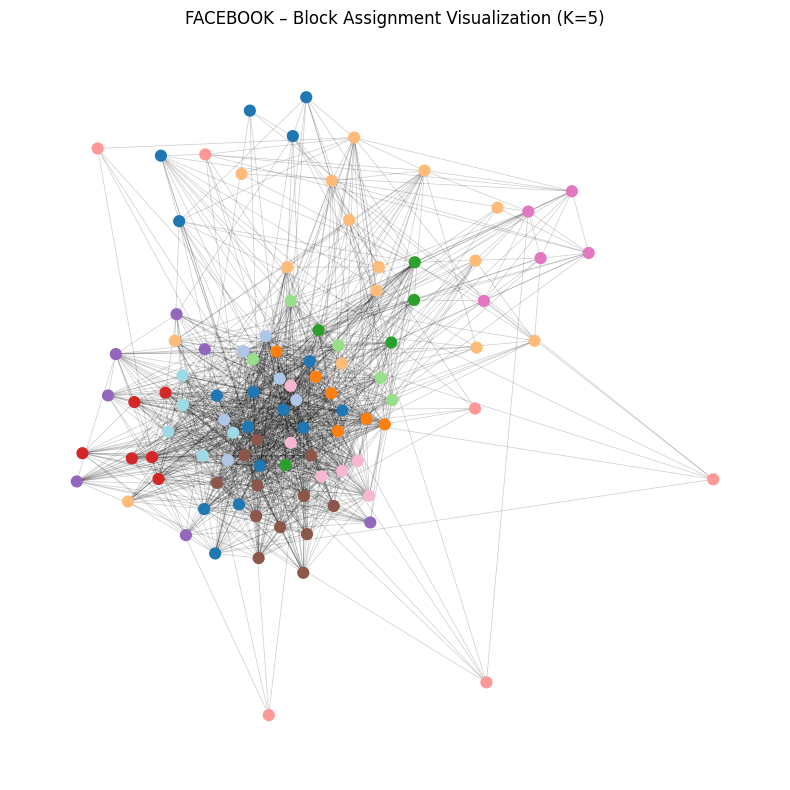

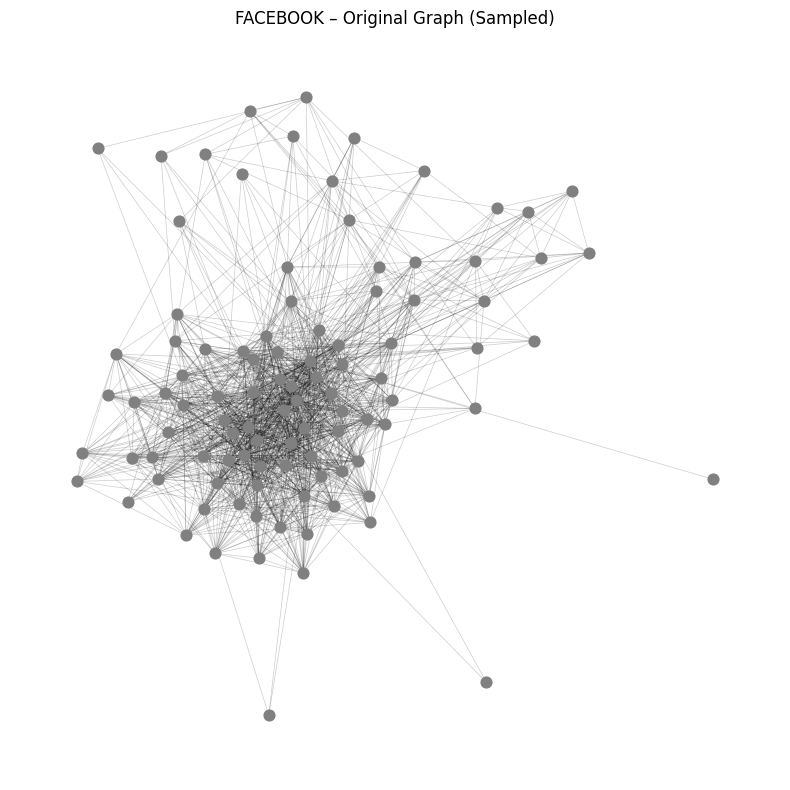

In [198]:
# --- Plot 2: Anonymized Graph w/ Block Assignment ---
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G_anonymized, pos=layout, alpha=0.2, width=0.5)
nx.draw_networkx_nodes(
    G_anonymized,
    pos=layout,
    node_color=z,
    cmap=plt.cm.tab20,
    node_size=60,
)
plt.title(f"{dataset.upper()} – Block Assignment Visualization (K={K})")
plt.axis("off")
plt.tight_layout()
plt.savefig(f"{plot_dir}/graph_structure_{filename_suffix}.png", dpi=500, bbox_inches="tight")
plt.show()

# --- Plot 3: Original Graph ---
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G_original, pos=layout, alpha=0.2, width=0.5)
nx.draw_networkx_nodes(
    G_original,
    pos=layout,
    node_color="gray",
    node_size=60,
)
plt.title(f"{dataset.upper()} – Original Graph (Sampled)")
plt.axis("off")
plt.tight_layout()
plt.savefig(f"{plot_dir}/graph_structure_original_{filename_suffix}.png", dpi=500, bbox_inches="tight")
plt.show()